## 機械力学テキスト 12章 ロボットシミュレーション
# プログラム例と実習

### 重要な注意
- このNotebookを開いただけの状態では，編集結果は保存されないので，各自，「ファイル」メニューから「ドライブにコピーを保存」してください．

### １．使用するライブラリの読込

In [1]:
#この枠をクリックしてアクティブにしてから，Shiftを押しながらEnterを押すと，枠内のコードが実行されます．以下同じです．
# '#'記号のあとの内容を「コメントアウト」と呼び，実行時に無視されます．

import numpy as np                 #数値計算ライブラリ
from math import sin, cos          #低機能だが計算が速い三角関数
from scipy.integrate import odeint #常微分方程式ライブラリ
import matplotlib.pyplot as plt    #グラフ作成ライブラリ
from matplotlib.animation import FuncAnimation #アニメーションライブラリ
from matplotlib import rc          #グラフ調整ライブラリ
from IPython.display import HTML   #ユーザーインターフェース拡張ライブラリ

### ２．運動方程式の数値解を求める関数

#### パラメータの設定

In [2]:
M = 2/3 #台車の質量
m = 1/3 #振り子の質量
l = 1   #振り子の長さ

#### 数値解を求める関数

In [3]:
def Solve(xx0, force):
    
    ### 運動方程式を1階化した微分方程式の定義
    def eom(xx,t):
        #注　python は配列の添字が0から
        x   = xx[0] #台車の変位
        dx  = xx[1] #台車の速度
        th  = xx[2] #振り子の角度
        dth = xx[3] #振り子の角速度
    
        ft = force(xx) #制御力
    
        A = np.array( #行列
            [
                [M+m,        m*l*cos(th)],
                [np.cos(th), l]
            ]
        )
    
        bb = np.array( #右辺のベクトル
            [m*l*(dth**2)*sin(th)+ft, 9.8*sin(th)]
        )
    
        A_inv = np.linalg.inv(A) #逆行列
        hh = np.dot(A_inv, bb)   #逆行列とベクトルの積
    
        dxx = np.array( #1階微分のベクトル
            [dx, hh[0], dth, hh[1]]
        )
    
        return dxx
    ###ここまで
    
    ### 時間軸を表す等差数列
    n = 200 #時刻の数
    ts = np.linspace(0, 25, n) #0秒から25秒までn等分
    
    ### 差分解法（数値積分）
    xxs = odeint(eom, xx0, ts)

    return (ts,xxs)

### ３．実際に数値解を求める

#### 外力を与える関数（ひとまず外力は０にしておく）

In [4]:
def force(xx):
    return 0

#### 初期値の設定（ちょっと傾いて静止）

In [5]:
xx0 = np.array([0, 0, 0.5, 0]) #時刻t=0 のx, dx, th, dth

#### そのときの数値解を求める

In [6]:
ts, xxs = Solve(xx0, force)

- <p style="color:red;"> ベクトル xx := (x, dx, th, dth) を **状態ベクトル** という．</p>

In [7]:
print(xxs) #各行が状態ベクトル，下に向かって時間が進行

[[ 0.00000000e+00  0.00000000e+00  5.00000000e-01  0.00000000e+00]
 [-1.45097140e-02 -2.29475042e-01  5.50313830e-01  8.07669267e-01]
 [-5.64122983e-02 -4.26770304e-01  7.05825770e-01  1.68223777e+00]
 [-1.16346447e-01 -4.92159399e-01  9.76361214e-01  2.63637627e+00]
 [-1.66925480e-01 -2.42464559e-01  1.37147983e+00  3.67371700e+00]
 [-1.54592549e-01  5.49443555e-01  1.90944830e+00  4.96162417e+00]
 [ 6.50731154e-04  1.99395897e+00  2.64381561e+00  6.80806131e+00]
 [ 2.93129173e-01  2.13509016e+00  3.55306781e+00  6.98859576e+00]
 [ 4.66609604e-01  6.67054939e-01  4.31070285e+00  5.11845023e+00]
 [ 4.89264856e-01 -1.91897070e-01  4.86505728e+00  3.78555189e+00]
 [ 4.42077732e-01 -4.84936158e-01  5.27323122e+00  2.73511885e+00]
 [ 3.81461910e-01 -4.41644839e-01  5.55574513e+00  1.77396158e+00]
 [ 3.37135159e-01 -2.51493849e-01  5.72224853e+00  8.91025034e-01]
 [ 3.19761785e-01 -2.31264481e-02  5.78269075e+00  7.90789826e-02]
 [ 3.31395666e-01  2.07198175e-01  5.74245632e+00 -7.25031957e

### ４．数値解の振動波形を確認する

#### 振動波形を描く関数

In [8]:
def Plot_Wave(ts, xxs):
    plt.plot(ts,xxs[:,0],label='x')        #台車の変位
    plt.plot(ts,xxs[:,1],label='dx/dt')    #台車の速度
    plt.plot(ts,xxs[:,2],label='th')       #振り子の角度
    plt.plot(ts,xxs[:,3],label='d(th)/dt') #振り子の角速度
    plt.xlabel('t')
    plt.ylabel('States')
    plt.legend()

#### 数値解の振動波形

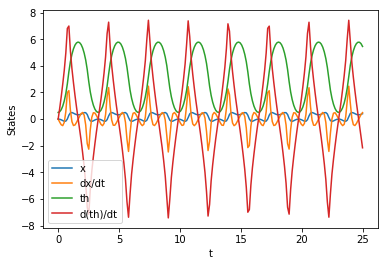

In [9]:
Plot_Wave(ts, xxs)

### ５．数値解からアニメーションを作る

#### 数値解をアニメーションする関数

In [10]:
def Animate(xxs, title='xxxxxxX'):
    
    ### アニメーション用のグラフ用紙を用意する
    fig, ax = plt.subplots(figsize=(8,3)) #グラフ用紙を作る
    plt.close() #ひとまず表示OFF
    ax.set_xlim(-4,4)      #グラフの縦軸の範囲
    ax.set_ylim(-1.5,1.5)  #グラフの横軸の範囲
    ax.grid()              #グリッドon
    ax.set_xlabel('X')     #横軸のラベル
    ax.set_ylabel('Y')     #縦軸のラベル
    ax.set_title(title)    #タイトル（学籍番号）
    line1, = ax.plot([], [], lw=2) #空の描画

    ### i 行目の状態ベクトルで描画データを更新する関数
    def update_anim(i):
        x = xxs[i,0]  #さっき計算したxxsの1列目（台車変位，添字は0）
        th = xxs[i,2] #さっき計算したxxsの3列目（振子角度，添字は2）
        #振り子支点の位置ベクトル
        XM = np.array([x, 0])
        #振り子先端の位置ベクトル
        Xm = XM + l*np.array([sin(th), cos(th)])
        #振り子の線分を描画    
        line1.set_data([XM[0],Xm[0]],[XM[1],Xm[1]]) #座標データの更新

    ### アニメーションデータの作成
    n = len(xxs) #データの行数（時間きざみの総数）
    anim = FuncAnimation(fig, update_anim, interval=100, frames=n)

    ### アニメーションの出力形式の設定
    rc('animation', html='jshtml')
    
    return anim

#### 実際にアニメーションする
- 表示されるまで少し計算時間がかかる．
- 表示されたら，再生ボタンを押すと，アニメーションが始まる．

In [11]:
Animate(xxs)

- こうしたシミュレーションでは，運動方程式に書いてない効果は，当然，再現されない．
    - 重力に抗する力は与えていないので，振り子は落下し，それに連動して台車も動く．
    - 床を作成していないので，振り子は下まで落ちて，スイングする．
    - 摩擦や空気抵抗がないので，スイングは持続する．

## 実習12.1（改）

- 最初から順に実行して，ここまでくれば，実習12.1は完了しています．

## 実習12.2（改）
- 次のセルの`force`と`xx0`を次のように書き換えて実行せよ．

```
def force(xx):
    return 20*xx[2]

xx0 = np.array([0, -3, 0.5, 1.2])
```

In [12]:
def force(xx):
    return 0

xx0 = np.array([0, 0, 0.5, 0])

ts, xxs = Solve(xx0, force)
Animate(xxs)

## 実習12.3（改）
- 次のセルの`force`と`xx0`を次のように書き換えて実行せよ．

```
def force(xx):
    return 20*xx[2] + 2*xx[3]

xx0 = np.array([0, -3, 0.3, 1.2])
```

In [13]:
def force(xx):
    return 0

xx0 = np.array([0, 0, 0.5, 0])

ts, xxs = Solve(xx0, force)
Animate(xxs)

## 実習12.4（改）
- 次のセルの`force`と`xx0`を，自分で書き換えて実行せよ．

In [14]:
def force(xx):
    return 0

xx0 = np.array([0, 0, 0.5, 0])

ts, xxs = Solve(xx0, force)
Animate(xxs)